By CARLO GUASTAMACCHIA

# Problem Defintion

Consider a parachute which has the shape described in the following figure.

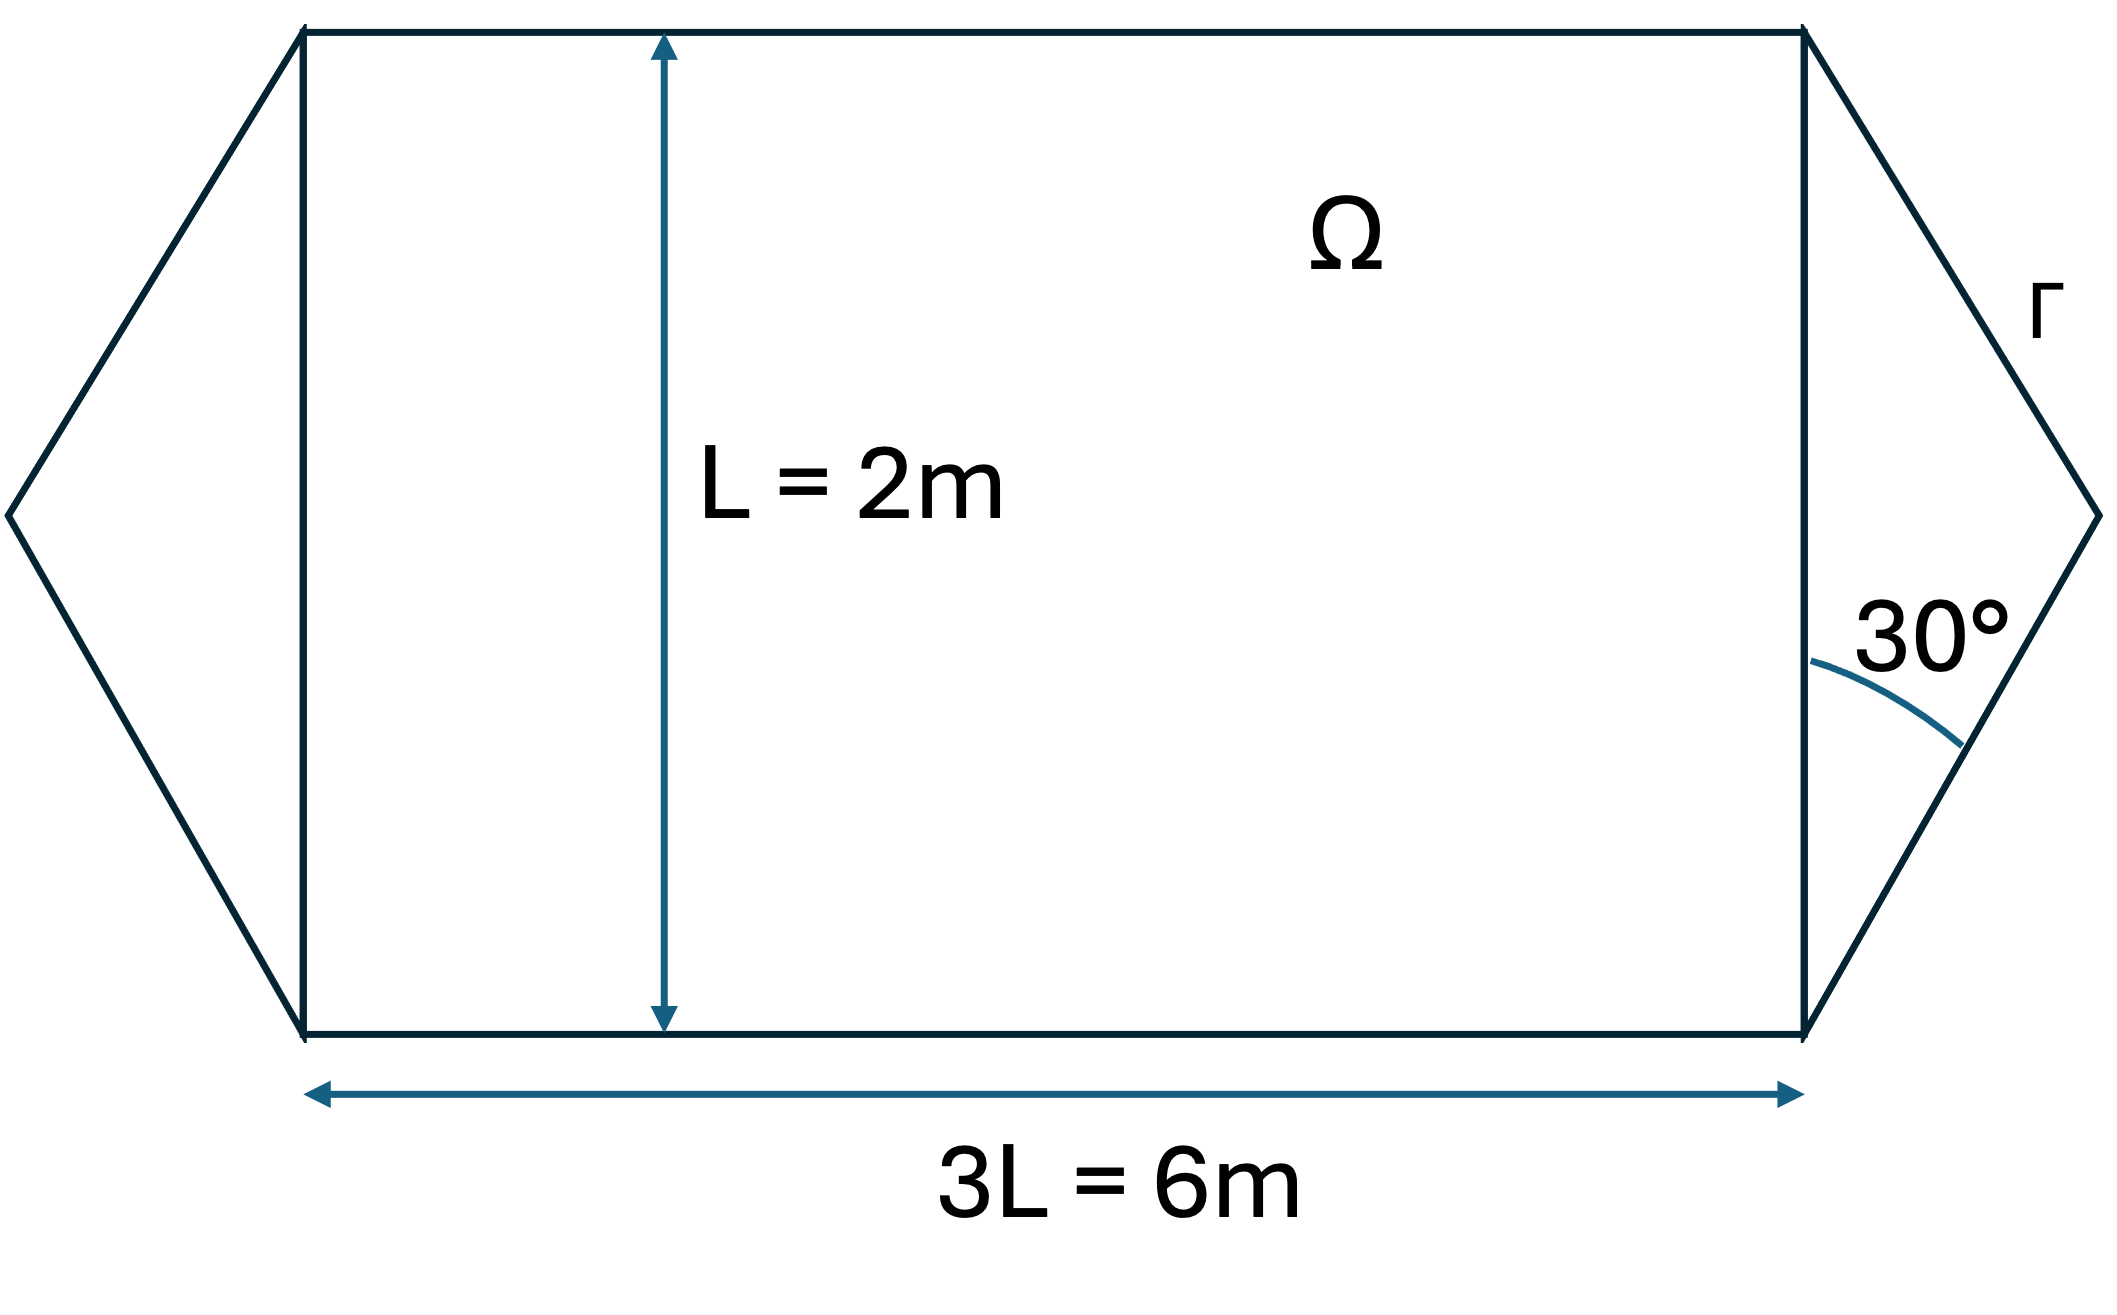

In [1]:
from IPython.display import Image, display
display(Image(filename='Domain.png', width=500))

We shall model the parachute as a linear flat membrane, fixed around its edge, and having a tention T. Normal load f acts on the parachute (by the air pressing on it). The normal deflection $u$ of the membrane satisfies:
$$
\begin{cases}
T\Delta u + f = 0 \text{ in } \Omega \\
u = 0  \text{ in } \Gamma
\end{cases}
$$
f is a function of u:
$$
f(u) = f_0 - s\left(1 - \beta \frac{u}{L} + \alpha \frac{u^2}{L^2}\right)
$$

with T = 1, L = 2, $f_0$ = 10, and three cases:

* Case 1: $\alpha = \beta = 0$ (The load depends linearly on u)
* Case 2: $\alpha = \frac{1}{6}, \beta = 0$ (The load depends monotonically on u)
* Case 3: $\alpha = \frac{1}{6}, \beta = \frac{3}{4}$ (The load depends non-monothically on u)


# Derivation of the FE formulation ##

Let's write the weak form:

$$   
\int_{\Omega}{wT\Delta u} \text{  } d\Omega - \int_{\Omega}{w S\left(1 - \beta \frac{u}{L} + \alpha{u^2}{L^2}\right)u} \text{  } d\Omega = -\int_{\Omega}{wf_0} \text{  } d\Omega
$$

Integrating by parts:
$$
\int_{\Gamma}{w T \underline{\nabla} u \cdot \underline{n}} \text{  } d\Gamma - \int_{\Omega}{\underline{\nabla} w T \underline{\nabla} u} \text{  } d\Omega - \int_{\Omega}{w S\left(1 - \beta \frac{u}{L} + \alpha{u^2}{L^2}\right)u} \text{  } d\Omega = -\int_{\Omega}{wf_0} \text{  } d\Omega
$$

Due to the homogeneous Dirichler Boundary Conditions one can chooes the Test function w to hold to the $H_0^1$ set:

$$
H^1 = \{ w \in L^2 | w_{,i} \in L^2 \}
$$

$$
H_0^1 = \{ w \in H^1 | w(\underline{x}) = 0 \text{ for } \underline{x} \in \Gamma \}
$$

Therefore one can remove the first part of the expression. The weak formulation of the problem becomes:

$$
\text{ find } u \in H_0^1 \text{ s.t. } a(w, u) = \ell(w) \text{ } \forall w \in H_0^1
$$

where:
$$
a(w, u) = \int_{\Omega}{\underline{\nabla} w T \underline{\nabla} u} \text{  } d\Omega + \int_{\Omega}{w S\left(1 - \beta \frac{u}{L} + \alpha{u^2}{L^2}\right)u} \text{  } d\Omega 
$$
$$
\ell(w) = \int_{\Omega}{wf_0} \text{  } d\Omega.
$$

Passing from the continuous spaces to the discretized ones:
$$
H_0^1 = S_0 \rightarrow S_0^h
$$


the problem becomes:

$$
\text{ find } u^h \in S_0^h \text{ s.t. } a(w^h, u^h) = \ell(w) \text{ } \forall w^h\in S_0^h.
$$

Chosen a certain base $\{ \phi_A \}$ of linear functions of the set $S_0^h$ the problem can be rewritten as:

$$
a \left( \phi_A, \sum_{B = 1}^N d_B \phi_B   \right) = \ell(\phi_A) \text{ }\forall \text{ } A = 1,2, ..., N
$$

and the compact form is:

$$
G_A(\underline{d}) = F_A \text{ }\forall \text{ } A = 1,2, ..., N.
$$

Which is equivalent to solve the non-linear system of equations:
$$
\underline{G}(\underline{d}) = \underline{F}.
$$

In order to solve the non linear system of equations 4-methods derived from the Newton-Rapson method will be implemented:

* Full Newton (FN)
* Modified Newton (MN)
* Full Newton with Incremental Loading (FNIL)
* Modified Newton with Incremental Loading (MNIL)

In order to assemble the linear system at each iteration of the newton problem a specific definition for $G_A$ and its derivative must be given.

$$
G_A  = \sum_{B=1}^{N} \int_{\Omega } \phi_{A,i} T \phi_{B, i} \text{ } d\Omega d_B + \sum_{B=1}^N d_B  S \int_{\Omega }\phi_A\left(1 - \beta \frac{\sum_{C=1}^N\phi_C d_C }{L} + \alpha \left(\frac{\sum_{C=1}^N\phi_C d_C }{L}\right)^2 \right) \phi_B \text{ }d\Omega
$$

$$
G_A  = \underline{K }_A^T \underline{d}  + G_{NL} (\underline{d} )
$$

where $\underline{\underline{K }} $ is the element stiffness matrix and $G_{NL} (\underline{d} )$ is the nonlinear part of the functional.
$$
\frac{\partial G_A }{\partial d_B} = K_{AB}  + S \int_{\Omega_A} \left(1 - \beta \frac{\sum_{C=1}^N\phi_C d_C }{L} + \alpha \left(\frac{\sum_{C=1}^N\phi_C d_C }{L}\right)^2 \right)\phi_B \text{ }d\Omega + \\ \sum_{B=1}^N d_BS\int_{\Omega }\phi_A\left(-\beta \frac{1}{L} + 2\alpha\frac{\sum_{C=1}^N \phi_Cd_C }{L^2}\right)\phi_B \phi_Bd\Omega
$$

This integrals have the formulation of a mass matrix element. So we will call them $M_{AB1}$ and $M_{AB2}$. The first depends on the first grade of $\phi_B$ and the second one on $\phi_B$ squared. All the three matrices are symmetric.

# Code Structure
The code is based on three utility files:

* `mesh.py`: contains the mesh class whose methods are used to build and plot the structured mesh of the problem,
* `assembling.py`: contains the classes which enable computation of the matrices and vector components of each element of the mesh and to assemble them in the global linear system,
* `solver.py`: contains the class solver which can be used to implement the different versions of the Newton method.

The complete implementation of each method and the analysis of the results has been done in the file `main.ipynb`.

# Domain definition and mesh computation

In order to exploit symmetry, the domain has been divided into four subdomains and the bottom right portion has been taken into account.
The vertices have been numbered in clockwise order starting from the center of the original domain.

The mesh is structured and is composed of triangular elements. The `msh()` method imported from `mesh.py` allows to initialize the class containing the connection matrix, node vector, and tags of the boundary nodes.

Computing mesh ...
16.0
Number of nodes:  1785
Number of elements:  3328


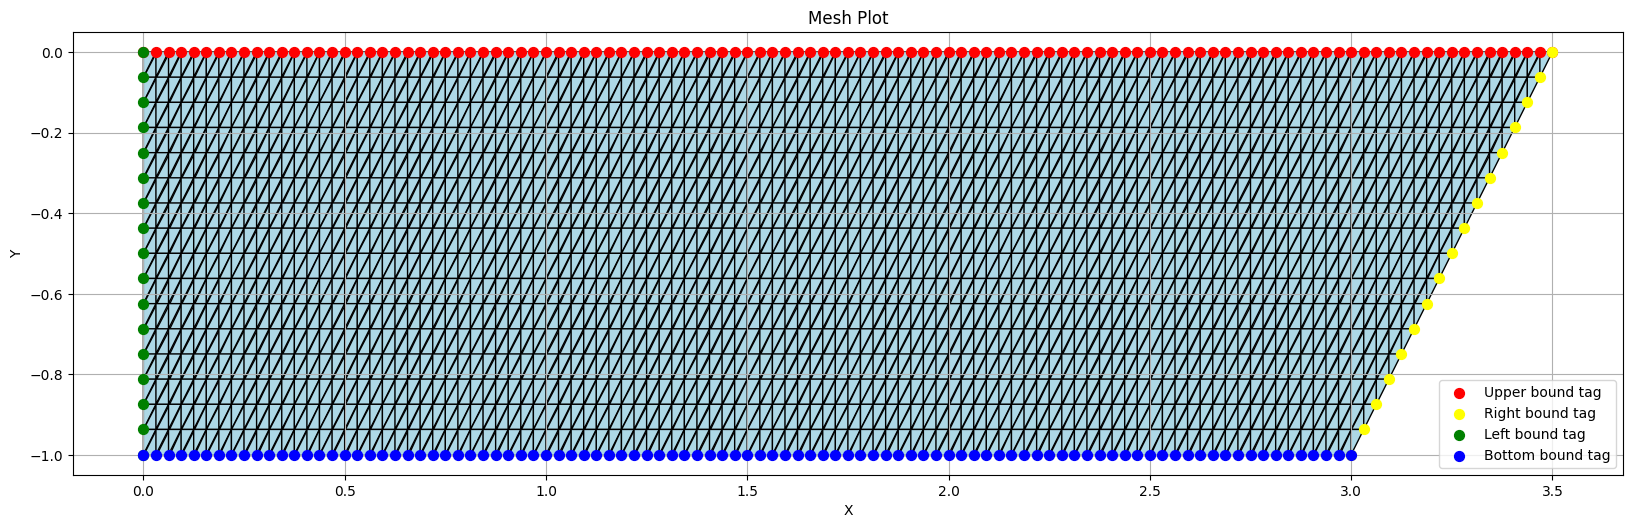

In [2]:
from mesh import mesh as msh
import numpy as np

# Domain parameters and definition
L = 2 #characterisitc length of the geometry
h_vert = 0.0625 #Vertical mesh size 
h_or = 1 / 2 * h_vert #Horizontal mesh size

#Coordinates of the four vertices
v0 = np.array([0,0]) #Point B
v1 = np.array([1.5 * L + 1 / 4 * L, 0]) #Point C
v2 = np.array([1.5 * L, - 1 / 2 * L]) #Point D
v3 = np.array([0, - 1 / 2 * L]) #Point A
vertices = [v0, v1, v2, v3]

#Generation of the mesh
#This function takes as arguments the mesh size in the Horizontal and vertical 
# direction and the four vertices of the domain

mesh = msh(h_or, h_vert, vertices)
conn_matrix = mesh.conn_matrix
#Plot of the mesh
mesh.plot_mesh()

In the following section the problem parameters are defined:

* f0 is the constant right and side of the problem. The constant component of the force acting on the parachute 
* T is the constant tension of the parachute 
* S is the cefficient that accounts for the linear increase of resistance with respect to the parachute deflection

Furthermore a list of the three case is defined varying $\alpha$ and $\beta$

In [3]:
# Problem parameters
f0 = 10 #10
T = 1 #Tension
S = 1.0 #Resistance parameter
cases = [(0,0), (1 / 6, 0), (1 / 6, 3 / 4)] #[(0,0), (1/6, 0), (1/6, 3/4)]

Than the boundary conditions are defined by initializing a list of boundaries where 1 is the right boundary and 2 is the bottom one. Furthermore the initial guess is defined as a constant function equal to 0.
In order to assemble the vector of the initial guess a variable of class `solution` must be defined. 

In [4]:

d_bc = [1,2] #Vlist of boundary conditions. 
#In this case the Dirichlet BCs are applyied to boundaries 1 and 2.

#Defining the initial guess
def guess(coord): #Initial guess u(x,y) = 0, coord = [x,y]
    return 0

from assembling import solution #import class 'solution' from file 'assembling.py'
sol_0 = solution(mesh) #Variable of class solution
sol_0.assemble(guess) #assemble the vector of the initial guess evaluated at the nodes



# Implementation of Newton Methods

In [5]:
#Import classes form assembling.py
from assembling import stiff_matrix, mass_non_lin_matrix_1, mass_non_lin_matrix_2, rhs, matrix_base, non_linear_functional
#Import class solver from solver.py
from solver import solver

from IPython.display import clear_output


## FULL NEWTON (FN)

In [6]:
#Defining the function Full Newton

def Full_Newton(Niter, alpha, beta, epsilon_R, epsilon_d, S, u0):
    K = stiff_matrix(mesh, T) #Variable of class: stiff_matrix
    def f(coord):
        return f0 #Defining a function wich depends on coord = [x,y] that represent the rhs
    F = rhs(mesh, f) #Initializing the rhs vector
    u = solution(mesh) #Defing a variable of class solution that leaves in the space of the mesh
    u.vect = u0.vect #Initializing the solution with the initial guess
    M_non_lin_1 = mass_non_lin_matrix_1(mesh, alpha, beta, S, L) #Initializing the first non linear matrix
    M_non_lin_2 = mass_non_lin_matrix_2(mesh, alpha, beta, S, L) #Initializing the second non linear matrix
    NL_functional = non_linear_functional(mesh, alpha, beta, S, L) #Initializing the G_NL vector

    #Assembling
    K.assemble() 
    F.assemble() 
    M_non_lin_1.assemble(u.vect)
    M_non_lin_2.assemble(u.vect)
    NL_functional.assemble(u.vect)
    A = matrix_base(mesh) #Initializing the iteration matrix
    R = matrix_base(mesh) #Initializing the Residual vector
    A.vect = K.vect + M_non_lin_1.vect + M_non_lin_2.vect

    #Apply Boundary Conditions
    A.apply_DC(d_bc)
    F.apply_DC(d_bc)
    K.apply_DC(d_bc)
    u.apply_DC(d_bc)
    NL_functional.apply_DC(d_bc)
    R.vect = F.vect - (np.dot(K.vect, u.vect) + NL_functional.vect)

    newton_solver = solver(u, epsilon_R, epsilon_d, A, F, R) #Initializing the solver
    for ii in range(Niter):
        print("Newton iteration: ", ii)
        ver = newton_solver.verification() #Verifing the convergence criteria
        if ver:
            break
        newton_solver.newton_iter(A, F, R) #Compute Increment and u(n+1)
        clear_output()
        u = newton_solver.get_solution() #Extract u(n + 1)
        u.restore_DC_dofs(d_bc) #Apply u_dc at the dirichlet boundary
        #Reassemble the matrices and apply BCs (this is not present in MN)
        M_non_lin_1.assemble(u.vect)
        M_non_lin_2.assemble(u.vect)
        NL_functional.assemble(u.vect)
        M_non_lin_1.apply_DC(d_bc)
        M_non_lin_2.apply_DC(d_bc)
        u.apply_DC(d_bc)
        NL_functional.apply_DC(d_bc)
        #Compute iteration matrix at n+1 and Residual vector at n+1
        A.vect = K.vect + M_non_lin_1.vect + M_non_lin_2.vect
        R.vect = F.vect - (np.dot(K.vect, u.vect) + NL_functional.vect)
    return u, newton_solver.Res_history, newton_solver.delta_history

## MODIFIED NEWTON (MN)

In [7]:
def Modified_Newton(Niter, alpha, beta, epsilon_R, epsilon_d, u0):
    K = stiff_matrix(mesh, T)
    K.assemble()
    def f(coord):
        return f0
    F = rhs(mesh, f)
    u = solution(mesh)
    u.vect = u0.vect
    F.assemble()
    M_non_lin_1 = mass_non_lin_matrix_1(mesh, alpha, beta, S, L)
    M_non_lin_2 = mass_non_lin_matrix_2(mesh, alpha, beta, S, L)
    NL_functional = non_linear_functional(mesh, alpha, beta, S, L)
    M_non_lin_1.assemble(u.vect)
    M_non_lin_2.assemble(u.vect)
    NL_functional.assemble(u.vect)
    A = matrix_base(mesh)
    R = matrix_base(mesh)
    A.vect = K.vect + M_non_lin_1.vect + M_non_lin_2.vect
    A.apply_DC(d_bc)
    F.apply_DC(d_bc)
    K.apply_DC(d_bc)
    u.apply_DC(d_bc)
    NL_functional.apply_DC(d_bc)
    R.vect = F.vect - (np.dot(K.vect, u.vect) + NL_functional.vect)

    newton_solver = solver(u, epsilon_R, epsilon_d, A, F, R)
    for ii in range(Niter):
        print("Newton iteration: ", ii)
        ver = newton_solver.verification()
        if ver:
            break
        newton_solver.newton_iter(A, F, R)
        clear_output()
        u = newton_solver.get_solution()
        u.restore_DC_dofs(d_bc)
        NL_functional.assemble(u.vect)
        u.apply_DC(d_bc)
        NL_functional.apply_DC(d_bc)
        R.vect = F.vect - (np.dot(K.vect, u.vect) + NL_functional.vect)
    return u, newton_solver.Res_history, newton_solver.delta_history

## FULL NEWTON WITH INCREMENTAL LODING (FNIL)

In [8]:
def Full_Newton_IL(Niter, alpha, beta, epsilon_R, epsilon_d, u0):
    K = stiff_matrix(mesh, T)
    K.assemble()
    def f(coord):
        return 0 
    F = rhs(mesh, f)
    u = solution(mesh)
    u.vect = u0.vect
    F.assemble()
    M_non_lin_1 = mass_non_lin_matrix_1(mesh, alpha, beta, S, L)
    M_non_lin_2 = mass_non_lin_matrix_2(mesh, alpha, beta, S, L)
    NL_functional = non_linear_functional(mesh, alpha, beta, S, L)
    M_non_lin_1.assemble(u.vect)
    M_non_lin_2.assemble(u.vect)
    NL_functional.assemble(u.vect)
    A = matrix_base(mesh)
    R = matrix_base(mesh)
    A.vect = K.vect + M_non_lin_1.vect + M_non_lin_2.vect
    A.apply_DC(d_bc)
    F.apply_DC(d_bc)
    K.apply_DC(d_bc)
    u.apply_DC(d_bc)
    NL_functional.apply_DC(d_bc)
    R.vect = F.vect - (np.dot(K.vect, u.vect) + NL_functional.vect)
    iter_idx = 0

    newton_solver = solver(u, epsilon_R, epsilon_d, A, F, R)
    External_iter = 10
    for n in range(External_iter): #Outer iterations 
        def f(coord):
            return f0 / External_iter * (n+1) #Compute incremental load
        F = rhs(mesh, f)
        F.assemble() #Assemble the rhs
        F.apply_DC(d_bc) 
        R.vect = F.vect - (np.dot(K.vect, u.vect) + NL_functional.vect) #Compute inital residual
        
        for ii in range(Niter): #Inner iterations
            print("Newton iteration: ", iter_idx)
            newton_solver.newton_iter(A, F, R)
            iter_idx += 1
            ver = newton_solver.verification()
            if ver:
                break
            clear_output()
            u = newton_solver.get_solution()
            u.restore_DC_dofs(d_bc)
            M_non_lin_1.assemble(u.vect)
            M_non_lin_2.assemble(u.vect)
            NL_functional.assemble(u.vect)
            M_non_lin_1.apply_DC(d_bc)
            M_non_lin_2.apply_DC(d_bc)
            u.apply_DC(d_bc)
            NL_functional.apply_DC(d_bc)
            A.vect = K.vect + M_non_lin_1.vect + M_non_lin_2.vect
            R.vect = F.vect - (np.dot(K.vect, u.vect) + NL_functional.vect)
            
    return u, newton_solver.Res_history, newton_solver.delta_history

## MODIFIED NEWTON INCREMENTAL LOADING (MNIL)

In [9]:
def Modified_Newton_IL(Niter, alpha, beta, epsilon_R, epsilon_d, u0):
    K = stiff_matrix(mesh, T)
    K.assemble()
    def f(coord):
        return 0 
    F = rhs(mesh, f)
    u = solution(mesh)
    u.vect = u0.vect
    F.assemble()
    M_non_lin_1 = mass_non_lin_matrix_1(mesh, alpha, beta, S, L)
    M_non_lin_2 = mass_non_lin_matrix_2(mesh, alpha, beta, S, L)
    NL_functional = non_linear_functional(mesh, alpha, beta, S, L)
    M_non_lin_1.assemble(u.vect)
    M_non_lin_2.assemble(u.vect)
    NL_functional.assemble(u.vect)
    A = matrix_base(mesh)
    R = matrix_base(mesh)
    A.vect = K.vect + M_non_lin_1.vect + M_non_lin_2.vect
    A.apply_DC(d_bc)
    F.apply_DC(d_bc)
    K.apply_DC(d_bc)
    u.apply_DC(d_bc)
    NL_functional.apply_DC(d_bc)
    R.vect = F.vect - (np.dot(K.vect, u.vect) + NL_functional.vect)
    iter_idx = 0

    newton_solver = solver(u, epsilon_R, epsilon_d, A, F, R)
    External_iter = 10
    for n in range(External_iter):
        def f(coord):
            return f0 / External_iter * (n+1)
        F = rhs(mesh, f)
        F.assemble()
        F.apply_DC(d_bc)
        R.vect = F.vect - (np.dot(K.vect, u.vect) + NL_functional.vect)
        
        for ii in range(Niter):
            print("Newton iteration: ", iter_idx)
            newton_solver.newton_iter(A, F, R)
            iter_idx += 1
            ver = newton_solver.verification()
            if ver:
                break
            clear_output()
            u = newton_solver.get_solution()
            u.restore_DC_dofs(d_bc)
            NL_functional.assemble(u.vect)
            u.apply_DC(d_bc)
            NL_functional.apply_DC(d_bc)
            R.vect = F.vect - (np.dot(K.vect, u.vect) + NL_functional.vect)
            
    return u, newton_solver.Res_history, newton_solver.delta_history

# Solve 

In this section the problem is solved with the four methods and some insights of the solver are extracted in order to analyse the performances.

In [10]:
from time import time 

# Solve
N_iter = 300 #Number of Newton iterations
epsilon_R = 5e-10 #Tolerance of the residual
epsilon_d = 5e-10 #Tolerance of the increment


## SOLVE WITH FN

In [11]:
# Solve with FN
FN_solutions_list = [] #Full Newton list of solutions for all the cases
FN_time_list = [] #Full Newton list of computation times for all the cases
FN_Res_history = [] #Full Newton list of residual vector norm for all the cases
FN_delta_history = [] #Full Newton list of increment vector norm for all the cases
FN_iter_list = [] #List of number of iterations for each case
for alpha, beta in cases:
    tic = time()
    # solve the problem with Full Newton algorithm and extract the final solution, 
    # the residual norm history and the increment norm history
    sol, Res, Delta = Full_Newton(N_iter, alpha, beta, epsilon_R, epsilon_d, S, sol_0)
    toc = time()
    #Add the the computed elements to the lists
    FN_time_list.append(toc - tic)
    FN_Res_history.append(Res)
    FN_delta_history.append(Delta)
    sol.restore_DC_dofs(d_bc)
    FN_solutions_list.append(sol)
    FN_iter_list.append(len(Res))


assembling mass matrix 1 ... 
assembling mass matrix 2 ... 
assembling non linear functional ... 
Newton iteration:  6
Conditions are respected


## SOLVE WITH MN

In [12]:
MN_solutions_list = []
MN_time_list = []
MN_Res_history = []
MN_delta_history = []
MN_iter_list = []
for alpha, beta in cases:
    tic = time()
    sol, Res, Delta = Modified_Newton(N_iter, alpha, beta, epsilon_R, epsilon_d, sol_0)
    toc = time()
    MN_time_list.append(toc - tic)
    MN_Res_history.append(Res)
    MN_delta_history.append(Delta)
    sol.restore_DC_dofs(d_bc)
    MN_solutions_list.append(sol)
    MN_iter_list.append(len(Res))

assembling non linear functional ... 
Newton iteration:  18
Conditions are respected


## SOLVE WITH FNIL

In [13]:
FNIL_solutions_list = []
FNIL_time_list = []
FNIL_Res_history = []
FNIL_delta_history = []
FNIL_iter_list = []
for alpha, beta in cases:
    tic = time()
    sol, Res, Delta = Full_Newton_IL(N_iter, alpha, beta, epsilon_R, epsilon_d, sol_0)
    toc = time()
    FNIL_time_list.append(toc - tic)
    FNIL_Res_history.append(Res)
    FNIL_delta_history.append(Delta)
    sol.restore_DC_dofs(d_bc)
    FNIL_solutions_list.append(sol)
    FNIL_iter_list.append(len(Res))

assembling mass matrix 1 ... 
assembling mass matrix 2 ... 
assembling non linear functional ... 
Newton iteration:  49
RESIDUAL =  1.0075681565160689e-13
Conditions are respected


## SOLVE WITH MNIL

In [14]:
MNIL_solutions_list = []
MNIL_time_list = []
MNIL_Res_history = []
MNIL_delta_history = []
MNIL_iter_list = []
for alpha, beta in cases:
    tic = time()
    sol, Res, Delta = Modified_Newton_IL(N_iter, alpha, beta, epsilon_R, epsilon_d, sol_0)
    toc = time()
    MNIL_time_list.append(toc - tic)
    MNIL_Res_history.append(Res)
    MNIL_delta_history.append(Delta)
    sol.restore_DC_dofs(d_bc)
    MNIL_solutions_list.append(sol)
    MNIL_iter_list.append(len(Res))

assembling non linear functional ... 
Newton iteration:  154
RESIDUAL =  5.029742656834476e-11
Conditions are respected


# Comparison of the solutions
In the following figures the solution is plotted for all the cases and methods. It is visible how the solution does not varies across the methods.

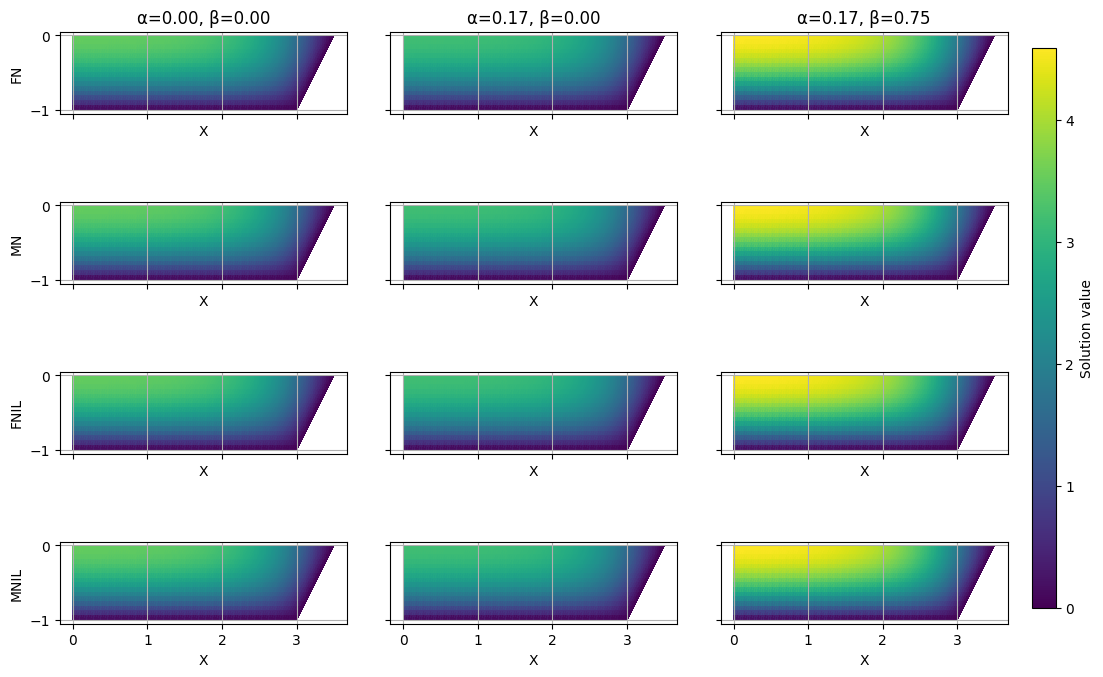

In [15]:
from graphics import plot_solutions_grid

solutions_list = [FN_solutions_list, MN_solutions_list, FNIL_solutions_list, MNIL_solutions_list]
methods = ['FN', 'MN', 'FNIL', 'MNIL']
plot_solutions_grid(solutions_list, cases, methods)

# Plot Solution at the Boundaries

In the following figures, the solutions at the left and top boundary (of the segmented domain) are plotted.

## FN SOLUTION AT INTERNAL BOUNDARIES

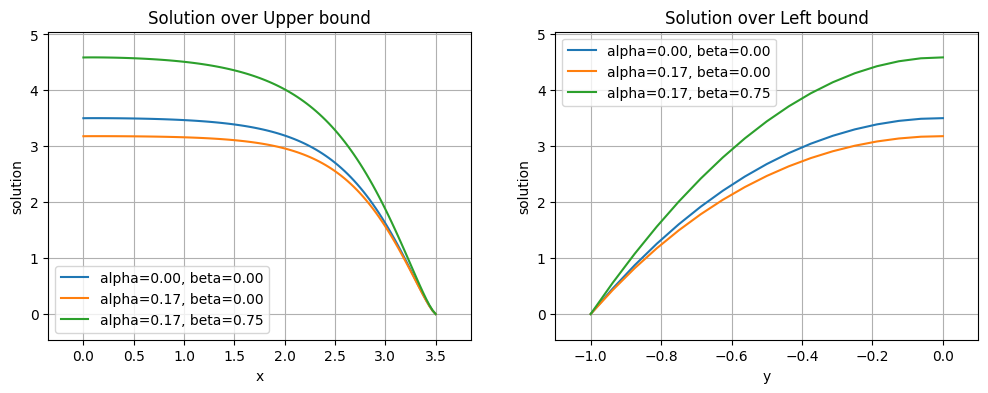

In [16]:
from graphics import plot_bound_sol

plot_bound_sol(FN_solutions_list, cases)

## MN SOLUTION AT INTERNAL BOUNDARIES

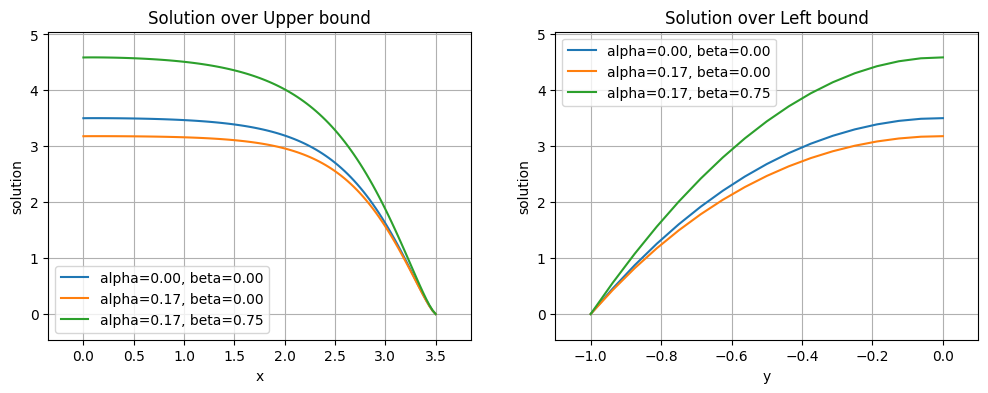

In [17]:
plot_bound_sol(MN_solutions_list, cases)

## FNIL SOLUTION AT INTERNAL BOUNDARIES

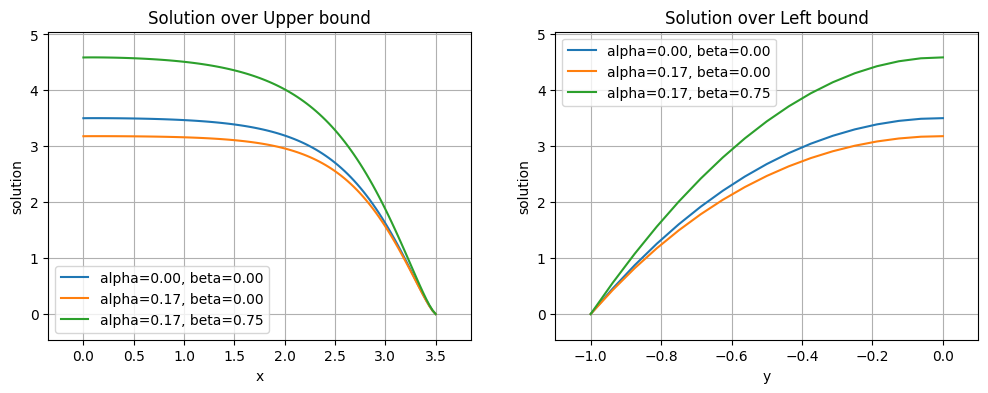

In [18]:
plot_bound_sol(FNIL_solutions_list,cases)

## MNIL SOLUTION AT INTERNAL BOUNDARIES

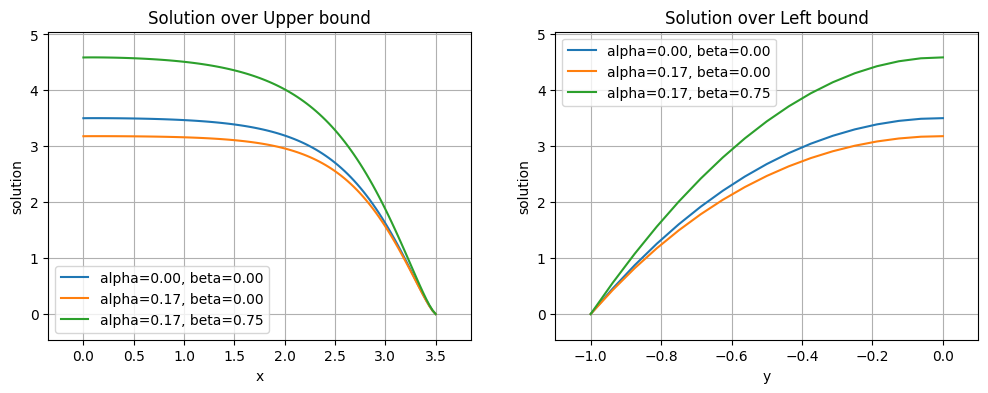

In [19]:
plot_bound_sol(MNIL_solutions_list, cases)

# Comparison of performances

In [20]:
from graphics import plot_table

# Define the (alpha, beta) values for each case
time_lists = [FN_time_list, MN_time_list, FNIL_time_list, MNIL_time_list]
n_iter_lists = [FN_iter_list, MN_iter_list, FNIL_iter_list, MNIL_iter_list]
plot_table(methods, cases, time_lists, n_iter_lists, "Time (s)", "Iter number")

Method                     FN    FNIL     MN    MNIL
alpha beta Variable                                 
0.00  0.00 Iter number      3      30      3      30
           Time (s)     3.548  19.627  1.685   7.756
0.17  0.00 Iter number      6      50     18     109
           Time (s)     5.909  33.897  5.033  25.353
      0.75 Iter number      6      50     18     155
           Time (s)     5.708  34.139  5.010  35.497

# Residual Analysis

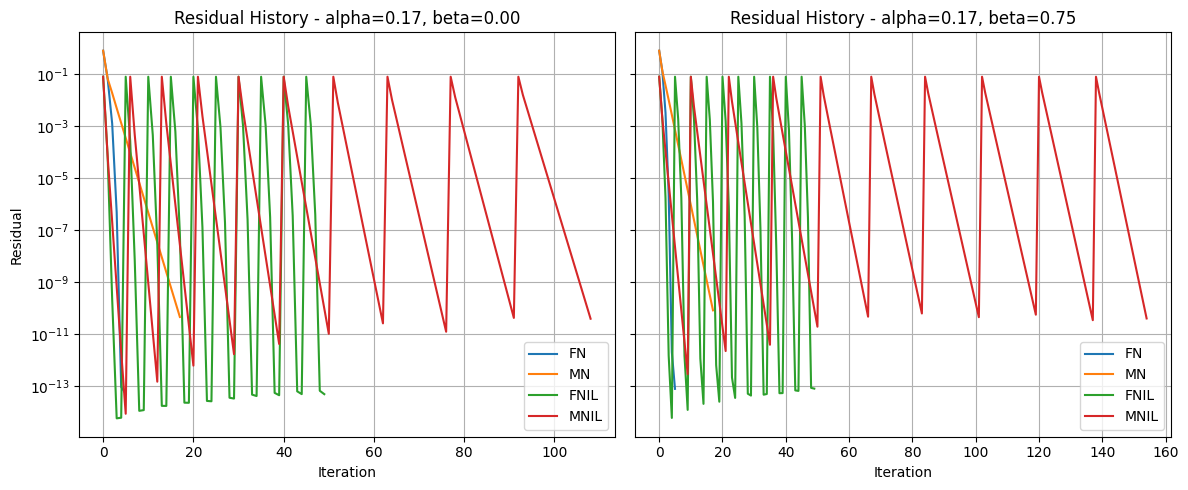

In [21]:
from graphics import plot_combined

# Define method names and residual histories
res_histories = [FN_Res_history, MN_Res_history, FNIL_Res_history, MNIL_Res_history]
case_labels = [f"alpha={alpha:.2f}, beta={beta:.2f}" for alpha, beta in cases]
plot_combined(methods, res_histories, case_labels, cases)



# Effect of S

Solve the problem for different values of S using the FN Method.

In [ ]:
case_idx = 0
sol_B_list = [] #list of solutions at point B
sol_B_list = [[] for alpha, beta in cases] #Initialize the list with the number of cases
sol_list_S_max = []
S_vect = np.linspace(0.1,50.1, 15) #Test 10 values of S between 0.1 and 50.1
for alpha, beta in cases:
    sol = sol_0
    for S in S_vect:
        print("CASE = ", case_idx)
        #Solve the problem with Full Newton
        sol, Res, Delta = Full_Newton(N_iter, alpha, beta, epsilon_R, epsilon_d, S, sol)

        #Apply the value of u_dc at the Dirichlet boundary
        sol.restore_DC_dofs(d_bc)

        #Add an element to the list of solutions at point B
        sol_B_list[case_idx].append(sol.vect[0])
    case_idx += 1
    sol_list_S_max.append(sol)


assembling mass matrix 1 ... 
assembling mass matrix 2 ... 
assembling non linear functional ... 
Newton iteration:  5
Conditions are respected


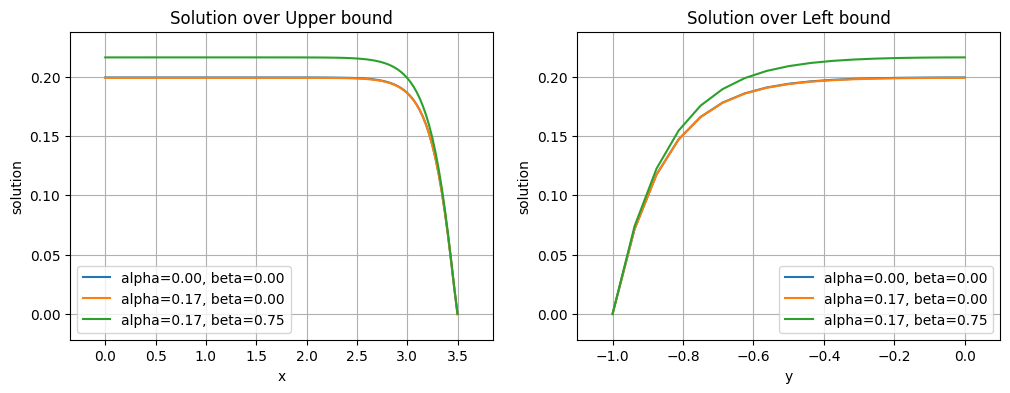

In [23]:
plot_bound_sol(sol_list_S_max, cases)

Plot the value of the solution at point B for different values of the parameter S.

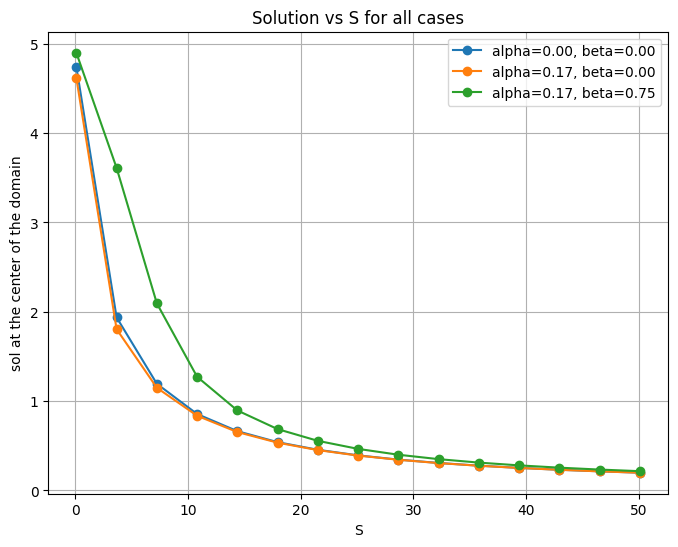

In [24]:
# Plot sol_B_list for all cases against S_vect
import matplotlib.pyplot as plt
case_labels = [f"alpha={alpha:.2f}, beta={beta:.2f}" for alpha, beta in cases]

plt.figure(figsize=(8, 6))
for idx, sol_B in enumerate(sol_B_list):
    plt.plot(S_vect, sol_B, marker='o', label=case_labels[idx])

plt.xlabel('S')
plt.ylabel('sol at the center of the domain')
plt.title('Solution vs S for all cases')
plt.legend()
plt.grid(True)
plt.show()

# Observations
The results furnished by the four methods are comparable, and all of them converge. As the four solutions are the same, this suggests that the initial guess was sufficiently close to the exact solution. We cannot be sure that the solution to which Newton converges is the exact one, but its shape is consistent with the physics of the problem.

As can be seen in the boundary plots, the monotonic case with $\alpha = 1/6$ and $\beta = 0$ presents the smallest displacements. This is due to the decrease of the force with respect to the linear case with $\alpha = 0$ and $\beta = 0$. The largest displacements are presented by the non-monotonic case with $\alpha = 1/6$ and $\beta = 3/4$, where it seems that the effect of the grade two component ($-\beta u^2/L^2$) is predominant.

S determines the value of the solution at the center of the domain to decrease, but only up to a certain level. For high values of S, the solution becomes less smooth and exhibits rapid drops close to the boundary. In these conditions, the difference betweeen case 1 and 2 tends to 0, while the effect of the grade two component is still visible.

Looking at the performance of the methods, it is possible to see that:

* There is no difference in terms of the number of iterations between the Full Newton and the Modified Newton methods, as the iteration matrix remains constant. The Modified Newton methods are faster due to the absence of overhead in terms of assembling. For the same reason, incremental loading has no reason to be applied in the first case, as the number of iterations is forced to be higher.

* The fastest method remains Modified Newton in both case 2 and case 3, due to the reduced computational time at each iteration, even if the number of iterations is three times that of Full Newton.

* Incremental loading increases the number of iterations and the total computational time, but it increases the accuracy of the solution and provides a set of solutions for different values of the right-hand side.

* The number of iterations for FN and MN between case 2 and case 3 does not change. This suggests that no change of gradient sign is encountered by the solver during computation of case 3. In contrast, the performance of MNIL changes significantly between case 2 and case 3, probably because the non-monotonic shape of the solution at lower values of $f_0$ makes FNIL more suitable for solving the problem, as it is not negatively affected by changes of slope in the solution. 

* The slope of the residual curve in the plot decreases at each outer iteration, suggesting that the Incremental Loading methods become slower as approaching the $f_0 = 10$.

# Code Appendix

In this appendix the code from the .py files is printed for completeness.

## CODE IN `mesh.py`

In [25]:
# %load mesh.py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection

# Class mesh is an object that contains the node vector and the connection matrix
# The initialization function of the mesh class requires as inputs:
# 1. the horizontal mesh size
# 2. the vertical mesh size
# 3. the vertices of th domain geometry in clock-wise order

#                /|   
#               / |   
#              /  | h_vert  
#             /   |
#            /____|
#             h_or


class mesh(object):

    #Initialization of the mesh class
    def __init__(self, h_or, h_vert, vertices):
        self.h_or = h_or
        self.h_vert = h_vert
        self.v0 = vertices[0]
        self.v1 = vertices[1]
        self.v2 = vertices[2]
        self.v3 = vertices[3]
        self.compute_mesh() #Compute the mesh
        self.tag_list = [self.tag_list_1, self.tag_list_2, self.tag_list_3, self.tag_list_4]


    #Computes the structured mesh
    def compute_mesh(self):
        print("Computing mesh ...")
        n = abs(self.v0[1] - self.v3[1]) / self.h_vert
        conn_matrix = [] #Initializing the connection matrix 
        self.tag_list_2 = [] #List of nodes at the right boundary
        self.tag_list_4 = [] #List of nodes at the left boundary
        print(n)
        if n - int(n) == 0:
            n = int(n) 
        else:
            raise ValueError("The number of nodes of the column is not an integer")
        for ii in range(n+1): #For each row ... do
            left_v = (self.v3 - self.v0) / n * (ii) + self.v0  #top left node
            right_v = (self.v2 - self.v1) / n * (ii) + self.v1 #top right node
            if ii == 0: #If this is the top row
                nodes = self.compute_row(left_v, right_v) #Compute nodes coordinates in the present row
                n_old = np.size(nodes, 0) 
                self.tag_list_1 = range(n_old) #Add all the nodes of the row to the tag list of the top boundary
                self.tag_list_2.append(n_old - 1) #Add the right node of the row to the tag list of the right boundary
                self.tag_list_4.append(0) #Add the left node of the row to the tag list of the left boundary
            else:
                row_new = self.compute_row(left_v, right_v) #Compute nodes coordinates in the present row
                n_new = np.size(row_new, 0)
                n_apt = np.size(nodes, 0)
                nodes = np.concatenate((nodes, row_new), axis=0)
                self.tag_list_2.append(n_apt + n_new - 1) #Add the right node of the row to the tag list of the right boundary
                self.tag_list_4.append(n_apt) #Add the left node of the row to the tag list of the left boundary
                

                #Compute the connection matrix 
                for k in range(n_new):
                    el_1 = [int(n_apt + k - n_old), int(n_apt + k - n_old + 1), int(n_apt + k)] #First triangle of the square
                    el_2 = [int(n_apt + k - n_old + 1), int(n_apt + k + 1), int(n_apt + k),] #Second triabgle of the square
                    conn_matrix.append(el_1)
                    if k < n_new-1: conn_matrix.append(el_2) 
                n_old = n_new
            if ii == n:
                self.tag_list_3 = range(n_apt, n_apt + n_new)
        print("Number of nodes: ", np.size(nodes, 0))
        print("Number of elements: ", np.size(conn_matrix, 0))

        self.nodes = nodes
        self.conn_matrix = conn_matrix

    #Computes the x coordinate of each node of the row
    def compute_row(self, left_v, right_v):
        n = abs(right_v[0] - left_v[0]) / self.h_or
        if n - int(n) == 0:
            n = int(n)
        else:
            raise ValueError("The number of nodes of the row is not an integer")
        
        v_row = np.linspace(left_v, right_v, n+1) 
        return v_row

    def plot_mesh(self):
        nodes = self.nodes
        elements = self.conn_matrix
        fig, ax = plt.subplots(figsize=(20,20))
        patches_list = []

        for element in elements:
            polygon = patches.Polygon(nodes[element], closed=True, edgecolor='k')
            patches_list.append(polygon)

        patch_collection = PatchCollection(patches_list, facecolor='lightblue', edgecolor='k', linewidth=1)
        ax.add_collection(patch_collection)

        tagged_coords = nodes[self.tag_list_1]
        ax.scatter(tagged_coords[:, 0], tagged_coords[:, 1], color='red', s=50, label='Upper bound tag', zorder=3)

        tagged_coords = nodes[self.tag_list_2]
        ax.scatter(tagged_coords[:, 0], tagged_coords[:, 1], color='yellow', s=50, label='Right bound tag', zorder=3)

        tagged_coords = nodes[self.tag_list_4]
        ax.scatter(tagged_coords[:, 0], tagged_coords[:, 1], color='green', s=50, label='Left bound tag', zorder=3)

        tagged_coords = nodes[self.tag_list_3]
        ax.scatter(tagged_coords[:, 0], tagged_coords[:, 1], color='blue', s=50, label='Bottom bound tag', zorder=3)

    



        ax.autoscale()
        ax.set_aspect('equal')
        plt.title('Mesh Plot')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid(True)
        plt.legend()
        plt.show()
    

## CODE IN `assembling.py`

In [26]:
# %load assembling.py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

#Class of the mesh element (triangle)
class elem(object):

    def __init__(self, vertices):
        self.vertices = vertices
        self.D = self.compute_surf()
        self.center = self.compute_center()
        self.phi, self.grad_phi = self.compute_functions()
    
    #Compute the shape functions and their gradient
    def compute_functions(self):
        v = self.vertices
        D = self.D
        v0 = v[0,:]
        v1 = v[1,:]
        v2 = v[2,:]
        x0,y0 = v0[0],v0[1]
        x1,y1 = v1[0],v1[1]
        x2,y2 = v2[0],v2[1]
        phi_0 = lambda x,y: 1 / D * ( (x1 * y2 - x2 * y1) + (y1 - y2)*x + (x2 - x1)*y)
        phi_1 = lambda x,y: 1 / D * ( (x2 * y0 - x0 * y2) + (y2 - y0)*x + (x0 - x2)*y)
        phi_2 = lambda x,y: 1 / D * ( (x0 * y1 - x1 * y0) + (y0 - y1)*x + (x1 - x0)*y)
        phi = [phi_0, phi_1, phi_2]
        phi_0x = 1 / D * (y1 - y2)
        phi_0y = 1 / D * (x2 - x1)
        phi_1x = 1 / D * (y2 - y0)
        phi_1y = 1 / D * (x0 - x2)
        phi_2x = 1 / D * (y0 - y1)
        phi_2y = 1 / D * (x1 - x0)
        grad_phi = [[ phi_0x, phi_0y], [phi_1x, phi_1y], [phi_2x, phi_2y]]
        return phi, grad_phi

    
    #Compute the determinant of thecoordinate matrix D = 2 * Area
    def compute_surf(self):
        v = self.vertices
        v0 = v[0,:]
        v1 = v[1,:]
        v2 = v[2,:]
        x0,y0 = v0[0],v0[1]
        x1,y1 = v1[0],v1[1]
        x2,y2 = v2[0],v2[1]
        return (x1 - x0)*(y2 - y0) - (x2 - x0)*(y1 - y0)
    
    #Compute the coordinates of the center of the element
    def compute_center(self):
        v = self.vertices
        v0 = v[0,:]
        v1 = v[1,:]
        v2 = v[2,:]
        x0,y0 = v0[0],v0[1]
        x1,y1 = v1[0],v1[1]
        x2,y2 = v2[0],v2[1]

        return [(x0 + x1 + x2) / 3, (y0 + y1 + y2) / 3]


    #Compute the linear stiffness matrix of the element
    #Gauss quadrature at the centroid
    def stiff_elem(self,a,b, T):
        grad_phi_A = self.grad_phi[a]
        grad_phi_B = self.grad_phi[b] 
        D = self.D
        return D / 2 * ( grad_phi_A[0]*grad_phi_B[0] + grad_phi_A[1]*grad_phi_B[1]) * T
    
    #Compute the non linear functional vector G_NL of the element
    #Gauss quadrature at the centroid
    def non_lin_functional(self, a,d_vect, alpha, beta, S, L):
        xc = self.center[0]
        yc = self.center[1]
        D = self.D
        phi_A = self.phi[a]
        uh = self.phi[0](xc,yc)*d_vect[0] + self.phi[1](xc,yc)*d_vect[1] + self.phi[2](xc,yc)*d_vect[2]
        return  uh * S * D / 2 * phi_A(xc, yc) * (1 - beta * uh / L + alpha * (uh / L)**2)
    
    #Compute non linear mass matrix of the element (first part -> grade 1)
    #Gauss quadrature at the centroid
    def mass_non_lin_elem_1(self,a,b,d_vect, alpha, beta, S, L):
        xc = self.center[0]
        yc = self.center[1]
        D = self.D
        phi_A = self.phi[a]
        phi_B = self.phi[b]
        uh = self.phi[0](xc,yc)*d_vect[0] + self.phi[1](xc,yc)*d_vect[1] + self.phi[2](xc,yc)*d_vect[2]
        return  S * D / 2  * (phi_A(xc,yc) * (1 - beta * uh * 1 / L +  alpha * (uh**2) * (1 / L ** 2))) * phi_B(xc,yc)
    
    #Compute non linear mass matrix of the element (second part -> grade 2)
    #Gauss quadrature at the centroid
    def mass_non_lin_elem_2(self,a,b,d_vect, alpha, beta, S, L):
        xc = self.center[0]
        yc = self.center[1]
        D = self.D
        phi_A = self.phi[a]
        phi_B = self.phi[b]
        uh = self.phi[0](xc,yc)*d_vect[0] + self.phi[1](xc,yc)*d_vect[1] + self.phi[2](xc,yc)*d_vect[2]
        I1 = (-beta * 1 / L + alpha * 2 * (uh) * (1 / L**2))* phi_B(xc,yc)
        return  D / 2 * S * phi_A(xc,yc) * I1 * uh
    
    #Compute the Right Hand Side vector of the element
    #Gauss quadrature at the centroid
    def compute_rhs(self,a,f):
        xc = self.center[0]
        yc = self.center[1]
        D = self.D
        phi_A = self.phi[a]
        return D / 2 * phi_A(xc,yc) * f([xc, yc])

#Baseline class for global matrices and vectors of the problem.
#It contains the shared methods and variables.

class matrix_base:
    def __init__(self, mesh):
        self.nodes = mesh.nodes
        self.conn_matrix = mesh.conn_matrix
        self.tag_list = mesh.tag_list
        self.vect = None

    def getShape(self):
        return self.vect.shape
    
    def apply_DC(self, boundaries):
        tag_list = self.tag_list
        tag_list_tot = []
        for ii in boundaries:
            tag_list_tot += tag_list[ii]

        # Gestisce sia vettori che matrici
        if self.vect.ndim == 2:
            A_new = np.delete(self.vect, tag_list_tot, axis=0)  # rimuove righe
            self.vect = np.delete(A_new, tag_list_tot, axis=1)  # rimuove colonne
        elif self.vect.ndim == 1:
            self.vect = np.delete(self.vect, tag_list_tot, axis=0)  # rimuove elementi

    def print(self):
        np.set_printoptions(threshold=np.inf)
        print(f"{self.__class__.__name__.upper()} = ", self.vect)

#Class of the Global Non linear functional G_NL based on the class matrix_base
class non_linear_functional(matrix_base):
    def __init__(self, mesh, alpha, beta, S, L):
        self.nodes = mesh.nodes
        self.conn_matrix = mesh.conn_matrix
        self.tag_list = mesh.tag_list
        self.alpha = alpha
        self.beta = beta
        self.S = S
        self.L = L
        self.vect = np.array([])

    #Assemble the global vector 
    def assemble(self, d):
        print("assembling non linear functional ... ")
        n = np.size(self.conn_matrix,0)
        n_nodes = np.size(self.nodes, 0)
        matrix = np.zeros((n_nodes))
        alpha = self.alpha
        beta = self.beta
        S = self.S
        L = self.L
        for ii in range(n):
            nodes_idx = self.conn_matrix[ii]
            vertices = self.nodes[nodes_idx,:]
            d_vect = d[nodes_idx]
            el = elem(vertices)
            for idx_1 in range(3):
                matrix[nodes_idx[idx_1]] += el.non_lin_functional(idx_1, d_vect, alpha, beta, S, L)
                if np.isnan(el.non_lin_functional(idx_1, d_vect, alpha, beta, S, L)):
                    print("D = ", el.D)
                    print(ii, "is NaN")
                    exit()
        self.vect = matrix
        return matrix

#Class of the Global linear Stiffness matrix, based on the class matrix_base
class stiff_matrix(matrix_base):
    def __init__(self, mesh, T):
        self.nodes = mesh.nodes
        self.conn_matrix = mesh.conn_matrix
        self.tag_list = mesh.tag_list
        self.T = T

    def assemble(self):
        print("assembling linear stiffness matrix ... ")
        n = np.size(self.conn_matrix,0)
        n_nodes = np.size(self.nodes, 0)
        matrix = np.zeros((n_nodes,n_nodes))
        for ii in range(n):
            nodes_idx = self.conn_matrix[ii]
            vertices = self.nodes[nodes_idx,:]
            el = elem(vertices)
            
            for idx_1 in range(3):
                for idx_2 in range(3):
                    matrix[nodes_idx[idx_1], nodes_idx[idx_2]] += el.stiff_elem(idx_1, idx_2, self.T)
                if np.isnan(el.stiff_elem(idx_1, idx_2, self.T)):
                    print(ii, " is NaN")
                    exit()
        self.vect = matrix
        return matrix
    

#Class of the Global non linear mass matrix (first part -> grade 1), based on the class matrix_base
class mass_non_lin_matrix_1(matrix_base):
    def __init__(self,mesh, alpha, beta, S, L):
        self.nodes = mesh.nodes
        self.conn_matrix = mesh.conn_matrix
        self.tag_list = mesh.tag_list
        self.alpha = alpha
        self.beta = beta
        self.S = S
        self.L = L
        self.vect = np.array([])

    def assemble(self, d):
        print("assembling mass matrix 1 ... ")
        n = np.size(self.conn_matrix,0)
        n_nodes = np.size(self.nodes, 0)
        matrix = np.zeros((n_nodes,n_nodes))
        alpha = self.alpha
        beta = self.beta
        S = self.S
        L = self.L
        for ii in range(n):
            nodes_idx = self.conn_matrix[ii]
            vertices = self.nodes[nodes_idx,:]
            d_vect = d[nodes_idx]
            el = elem(vertices)
            
            for idx_1 in range(3):
                for idx_2 in range(3):
                    matrix[nodes_idx[idx_1], nodes_idx[idx_2]] += el.mass_non_lin_elem_1(idx_1, idx_2, d_vect, alpha, beta, S, L)
                if np.isnan(el.mass_non_lin_elem_1(idx_1, idx_2, d_vect, alpha, beta, S, L)):
                    print(ii, " is NaN")
                    exit()
        self.vect = matrix
        return matrix

#Class of the Global non linear mass matrix (Second part -> grade 2), based on the class matrix_base
class mass_non_lin_matrix_2(matrix_base):
    def __init__(self, mesh, alpha, beta, S, L):
        self.nodes = mesh.nodes
        self.conn_matrix = mesh.conn_matrix
        self.tag_list = mesh.tag_list
        self.alpha = alpha
        self.beta = beta
        self.S = S
        self.L = L
        self.vect = np.array([])

    def assemble(self, d):
        print("assembling mass matrix 2 ... ")
        n = np.size(self.conn_matrix,0)
        n_nodes = np.size(self.nodes, 0)
        matrix = np.zeros((n_nodes,n_nodes))
        alpha = self.alpha
        beta = self.beta
        S = self.S
        L = self.L
        for ii in range(n):
            nodes_idx = self.conn_matrix[ii]
            vertices = self.nodes[nodes_idx,:]
            d_vect = d[nodes_idx]
            el = elem(vertices)
            
            for idx_1 in range(3):
                for idx_2 in range(3):
                    matrix[nodes_idx[idx_1], nodes_idx[idx_2]] += el.mass_non_lin_elem_2(idx_1, idx_2, d_vect, alpha, beta, S, L)
                if np.isnan(el.mass_non_lin_elem_2(idx_1, idx_2, d_vect, alpha, beta, S, L)):
                    print(ii, " is NaN")
                    exit()
        self.vect = matrix
        return matrix
    
#Class of the global Right Hand Side vector, based on the class matrix_base
class rhs(matrix_base):
    def __init__(self, mesh, f):
        self.f = f
        self.nodes = mesh.nodes
        self.conn_matrix = mesh.conn_matrix
        self.tag_list = mesh.tag_list
        self.vect = self.assemble()

    def assemble(self):
        print("assembling right hand side ... ")
        n = np.size(self.conn_matrix,0)
        n_nodes = np.size(self.nodes, 0)
        matrix = np.zeros((n_nodes))
        f = self.f
        for ii in range(n):
            nodes_idx = self.conn_matrix[ii]
            vertices = self.nodes[nodes_idx,:]
            el = elem(vertices)
            for idx_1 in range(3):
                matrix[nodes_idx[idx_1]] += el.compute_rhs(idx_1, f)
                if np.isnan(el.compute_rhs(idx_1, f)):
                    print("D = ", el.D)
                    print(ii, "is NaN")
                    exit()
        self.vect = matrix
        return matrix
    
    def plot(self):
        nodes = self.nodes
        elements = self.conn_matrix
        u = self.vect
        # Create a triangulation object
        triangulation = tri.Triangulation(nodes[:, 0], nodes[:, 1], elements)

        # Plot the solution as a color map
        plt.figure(figsize=(8, 6))
        tpc = plt.tripcolor(triangulation, u, shading='flat', cmap='viridis')
        plt.colorbar(tpc, label='Solution value')
        plt.title('Solution over the Mesh')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.gca().set_aspect('equal')
        plt.grid(True)
        plt.show()

#Class of the solution vector, based on the class matrix_base
class solution(matrix_base):
    def __init__(self, mesh):
        self.nodes = mesh.nodes
        self.conn_matrix = mesh.conn_matrix
        self.tag_list = mesh.tag_list
        self.vect = np.zeros(np.size(self.nodes, 0))

    def restore_DC_dofs(self, boundaries):
        tag_list = self.tag_list
        tag_list_tot = []
        for ii in boundaries:
            tag_list_tot += tag_list[ii]
        sol = np.zeros(np.size(self.nodes, 0))
        list_global = range(len(sol))
        list_full = [item for item in list_global if item not in tag_list_tot]
        sol[list_full] = self.vect
        self.vect = sol

    def assemble(self, f):
        F = np.zeros(np.size(self.nodes, 0))
        for idx,node in enumerate(self.nodes):
            F[idx] = f(node)
            self.vect = F

    def print(self):
        np.set_printoptions(threshold=np.inf)
        print("Solution = ", self.vect)

    

    def plot(self):
        nodes = self.nodes
        elements = self.conn_matrix
        u = self.vect
        # Create a triangulation object
        triangulation = tri.Triangulation(nodes[:, 0], nodes[:, 1], elements)

        # Plot the solution as a color map
        plt.figure(figsize=(8, 6))
        tpc = plt.tripcolor(triangulation, u, shading='flat', cmap='viridis')
        plt.colorbar(tpc, label='Solution value')
        plt.title('Solution over the Mesh')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.gca().set_aspect('equal')
        plt.grid(True)
        plt.show()
    
    def plot_overline(self, side, axis):

        if side == 0:
            side_name = "Upper bound"
        elif side == 1:
            side_name = "Right bound"
        elif side == 2:
            side_name = "Bottom bound"
        else:
            side_name = "Left bound"

        if axis == 0:
            axis_name = "x"
        elif axis == 1:
            axis_name = "y"
        else:
            axis_name = "s"
        plot_nodes = self.nodes[self.tag_list[side]]
        if axis < 2:
            plot_coord = plot_nodes[:,axis]
        else:
            diff = np.array(plot_nodes[-1]) - np.array(plot_nodes[0])
            diff = np.linalg.norm(diff)
            plot_coord = np.linspace(0, diff, len(plot_nodes))

        
        plot_vect = self.vect[self.tag_list[side]]
        plot = plt.plot(plot_coord, plot_vect)
        plt.title(f'Solution over {side_name}')
        plt.xlabel(axis_name)
        plt.ylabel('solution')
        plt.gca().set_aspect('auto')
        plt.grid(True)
        return plot
        

        

        
                
                


    

## CODE IN `solver.py`

In [27]:
# %load solver.py
import numpy as np
import scipy.linalg as sp
from assembling import stiff_matrix, rhs

#Definition of solver class
class solver(object):
    #Initialization requires:
    #The initial Guess
    #The resdiual tolerance
    #The increment tolerance
    #These variables remain constant across iterations

    #The initial sitffness matrix
    #The initial RHS vector
    #The initial Residual
    def __init__(self, guess, epsilon_R, epsilon_d, K, F, R):
        self.epsilon_R = epsilon_R
        self.epsilon_d = epsilon_d
        self.Res = R.vect
        self.delta = self.linear_solver(K.vect, self.Res)
        self.d = guess
        self.cond_1 = np.linalg.norm(self.Res) / np.linalg.norm(F.vect) < self.epsilon_R
        self.cond_2 = np.linalg.norm(self.delta) / np.linalg.norm(self.d.vect) < self.epsilon_d
        self.Res_history = []
        self.delta_history = []

    #Define the linear solver used to solve the system A * Delta_d = R
    def linear_solver(self, A, R):
        u = sp.solve(A, R)
        return u
    
    #Method used to upgrade the infos of the newton iteration and 
    # extract the incrment by solving the linear system
    def newton_iter(self, K, F, R):
        self.Res = R.vect
        print("RESIDUAL = ", np.linalg.norm(self.Res) / np.linalg.norm(F.vect))
        self.cond_1 = np.linalg.norm(self.Res) / np.linalg.norm(F.vect) < self.epsilon_R
        self.cond_2 = np.linalg.norm(self.delta) / np.linalg.norm(self.d.vect) < self.epsilon_d
        self.delta = self.linear_solver(K.vect, self.Res)
        self.d.vect = self.d.vect + self.delta
        self.Res_history.append(np.linalg.norm(self.Res))
        self.delta_history.append(np.linalg.norm(self.delta))

    #Method used to verify the convergence conditions
    def verification(self):
        if self.cond_1 and self.cond_2:
            print("Conditions are respected")
            ver = True
        elif self.cond_1 and not(self.cond_2):
            print("Only residual criterium is respected")
            ver = False
        elif self.cond_2 and not(self.cond_1):
            ver = False
            print("Only increment criterium is respected")
        else:
            ver = False
            print("No criterium is respected")
        return ver
    
    #Getter of the solution at the present iteration
    def get_solution(self):
        #print(self.d.vect)
        return self.d

        

        



## CODE IN `graphics.py`

In [28]:
# %load graphics.py
import matplotlib.pyplot as plt
import pandas as pd

def plot_bound_sol(solutions_list,cases):
    fig, axis = plt.subplots(1, 2, figsize=(12, 4))

    # First subplot
    plt.sca(axis[0])
    lines = []
    for idx, (alpha, beta) in enumerate(cases):
        sol = solutions_list[idx]
        line = sol.plot_overline(0, 0)
        lines.append(line[0])
        lines[-1].set_label(f"alpha={alpha:.2f}, beta={beta:.2f}")

    axis[0].legend()
    axis[0].margins(x=0.1, y=0.1)
    # Second subplot
    plt.sca(axis[1])
    lines = []
    for idx, (alpha, beta) in enumerate(cases):
        sol = solutions_list[idx]
        line = sol.plot_overline(3, 1)
        lines.append(line[0])
        lines[-1].set_label(f"alpha={alpha:.2f}, beta={beta:.2f}")

    axis[1].legend()
    axis[1].margins(x=0.1, y=0.1)
    plt.show()

def plot_table(methods, cases, list1, list2, variable_1, variable_2):

    # Prepare data with MultiIndex (alpha, beta) and variable (Time, Residual)
    data = []
    for i, (alpha, beta) in enumerate(cases):
        for method, t_list, n_list in zip(methods, list1, list2):
            data.append({
                'alpha': f"{alpha:.2f}",
                'beta': f"{beta:.2f}",
                'Method': method,
                'Variable': variable_1,
                'Value': f"{t_list[i]:.3f}"
            })
            data.append({
                'alpha': f"{alpha:.2f}",
                'beta': f"{beta:.2f}",
                'Method': method,
                'Variable': variable_2,
                'Value': f"{n_list[i]:.0f}"
            })

    df = pd.DataFrame(data)
    df.set_index(['alpha', 'beta', 'Variable'], inplace=True)
    table = df.pivot(columns='Method', values='Value')
    display(table)

def plot_combined(methods, res_histories, case_labels, cases):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

    # Plot for case 2 (index 1)
    for method, res_list in zip(methods, res_histories):
        axes[0].plot(res_list[1], label=method)
    axes[0].set_title(f"Residual History - {case_labels[1]}")
    axes[0].set_xlabel("Iteration")
    axes[0].set_ylabel("Residual")
    axes[0].set_yscale('log')
    axes[0].legend()
    axes[0].grid(True)

    # Plot for case 3 (index 2)
    for method, res_list in zip(methods, res_histories):
        axes[1].plot(res_list[2], label=method)
    axes[1].set_title(f"Residual History - {case_labels[2]}")
    axes[1].set_xlabel("Iteration")
    axes[1].set_yscale('log')
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

import matplotlib.tri as tri

def plot_solutions_grid(solutions_grid, cases, methods):
    """
    solutions_grid: 2D list/array of solution objects, shape (n_methods, n_cases)
    cases: list of (alpha, beta) tuples
    methods: list of method names (strings)
    """
    import matplotlib.tri as tri
    import matplotlib.pyplot as plt

    n_methods = len(methods)
    n_cases = len(cases)
    all_u = [sol.vect for row in solutions_grid for sol in row]
    vmin = min(u.min() for u in all_u)
    vmax = max(u.max() for u in all_u)

    fig, axes = plt.subplots(
        n_methods, n_cases, 
        figsize=(4*n_cases, 2.0*n_methods), 
        sharex=True, sharey=True,
        gridspec_kw={'wspace': 0.15, 'hspace': 0.05}
    )
    if n_methods == 1:
        axes = [axes]
    if n_cases == 1:
        axes = [[ax] for ax in axes]

    tpc = None
    for i, method in enumerate(methods):
        for j, (alpha, beta) in enumerate(cases):
            sol = solutions_grid[i][j]
            nodes = sol.nodes
            elements = sol.conn_matrix
            u = sol.vect
            triangulation = tri.Triangulation(nodes[:, 0], nodes[:, 1], elements)
            ax = axes[i][j]
            tpc = ax.tripcolor(triangulation, u, shading='flat', cmap='viridis', vmin=vmin, vmax=vmax)
            if i == 0:
                ax.set_title(f'α={alpha:.2f}, β={beta:.2f}')
            if j == 0:
                ax.set_ylabel(method)
            ax.set_xlabel('X')
            ax.set_aspect('equal')
            ax.grid(True)

    # Adjust layout before adding colorbar
    plt.subplots_adjust(right=0.87, left=0.08, top=0.92, bottom=0.08, wspace=0.15, hspace=0.05)
    # Place colorbar to the right of all subplots
    cbar_ax = fig.add_axes([0.89, 0.15, 0.02, 0.7])
    fig.colorbar(tpc, cax=cbar_ax, label='Solution value')
    plt.show()
